Привет!

Меня зовут Вячеслав Погорелый, и я буду проводить ревью твоего проекта. 

Предлагаю перейти на "ты", если не против)

Но если это не удобно - дай знать, и мы перейдем на "вы". Моя главная задача — не находить сделанные тобою ошибки, а передать свой опыт и помочь тебе стать аналитиком данных.

Я отметил комментарии и замечания разным цветом далее по тексту markdown:

---    
<div class="alert alert-block alert-danger">
    
### Ошибка
    
Критическое замечание, которые следует исправить.
</div> 
    
---
    
<div class="alert alert-block alert-warning">
    
### Совет
    
Замечание\совет на будущее.
</div>
    
---
    
<div class="alert alert-block alert-success">
    
### Успех
    
Когда всё сделано правильно.
</div>
    
    
    
Будет здорово, если для ответов ты выберешь любой **<font color="maroon">читабельный и заметный цвет</font>**, так мне будет проще все проверить.


При доработке проекта попрошу тебя сохранить и не видоизменять заметки ревьюера, это осложняет повторную проверку.

<div class="alert alert-block alert-info">
 
# Итоговый Комментарий ревьюера ver.2 
    
#### Успех
    
Спасибо тебе большое за быстрое исправление замечаний. Вот теперь проект я могу принять. Ты отлично постарался. Я от себя желаю тебе успехов в дальнейшей учебе. Ты точно справишься, я уверен.
</div

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

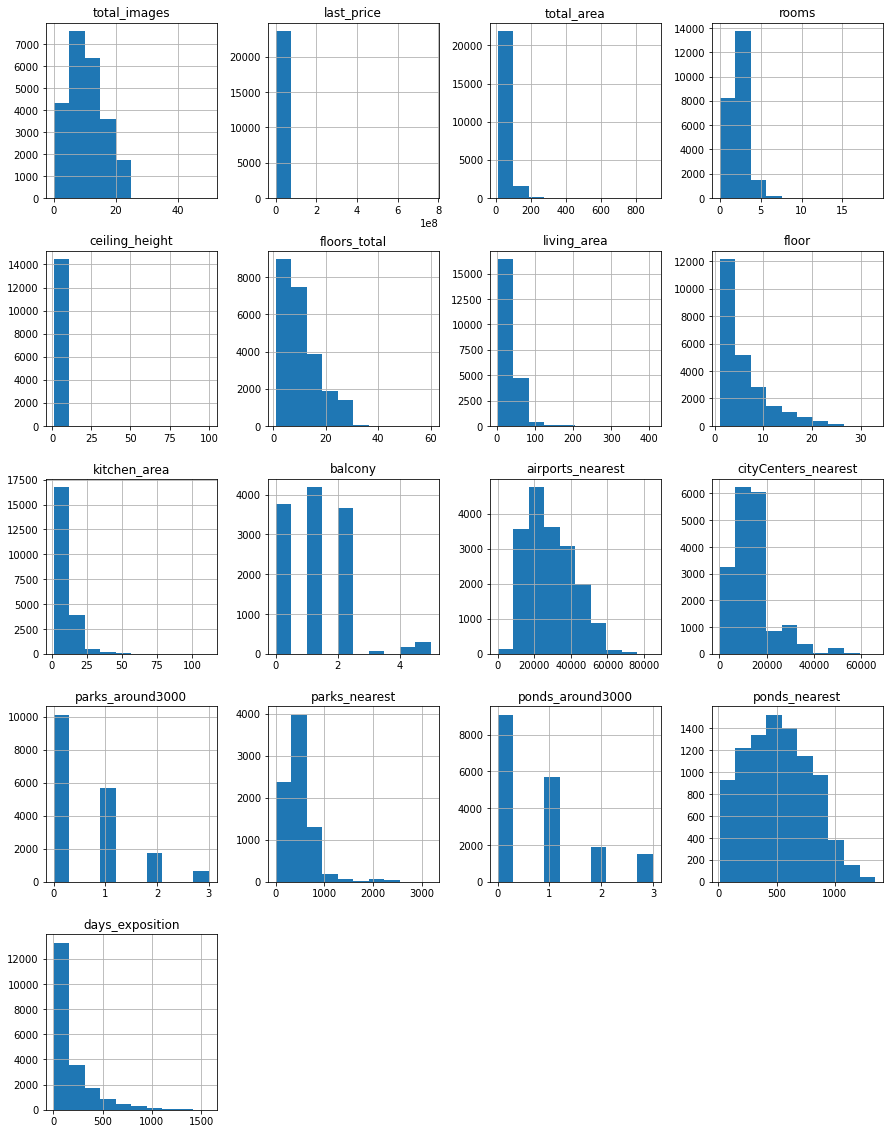

In [4]:
data.info()
data.hist(figsize=(15,20))

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Супер, проект сохранене в переменную. 
</div 

<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет
    
А почему вывод информации закомментировал? 
</div 

<font color="purple"> Комментарий студента: Закомментировал для того, чтобы уменьшить объем для удобного просмотра и проверки проекта. Наверное, так лучше не делать.

<div class="alert alert-block alert-success">
 
# Комментарий ревьюера ver.2 
    
#### Успех
    
Можно было оставить для наглядности. 
</div 

### Предобработка данных

In [5]:
display(data.isna().sum()) 

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [6]:
data['last_price'] = data['last_price'].astype('int32')

<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет
    
Для экономии вычислительной памяти лучше всего перевести в int32 
</div 

<font color="purple"> Комментарий студента: Спасибо за рекомендацию, исправил на int32.

В данном столбце лучше изменить цену на тип int32, для удобного просмотра.

In [7]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')

В данном столбце не указаны часы, поэтому стоит поменять формат.

In [8]:
data.loc[data['ceiling_height'] > 20, 'ceiling_height'] = data.loc[data['ceiling_height'] > 20, 'ceiling_height'] / 10
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median()) 
#display(data['ceiling_height'].unique()) 

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Тут хорошо, согласен. 
</div 

В данном столбце присутствуют уникальные значения, например, высота потолков > 20 метров. Такие аномальные значения уберем путем loc и деления при высоте больше 20 на 10. 

In [9]:
#data['floors_total'] = data['floors_total'].fillna(data['floors_total'].median()) 
#data['floors_total'] = data['floors_total'].astype('int')

<div class="alert alert-block alert-danger">
 
### Комментарий ревьюера
    
#### Ошибка 
    
Не особо верное решение. Так у тебя будут значения, которые выше текущего этажа квартир. Пропусков мало, поэтому лучше их игнорировать или удалить. 
</div 

<font color="purple"> Комментарий студента: Спасибо за рекомендацию. Долго ломал голову, стоит ли менять значения или оставить без изменений. Закомментировал код, чтобы не мешался.  

<div class="alert alert-block alert-success">
 
# Комментарий ревьюера ver.2 
    
#### Успех
    
Супер 
</div

In [10]:
living_mean = data['living_area'].mean() / data['total_area'].mean()
kitchen_mean = data['kitchen_area'].mean() / data['total_area'].mean()
data['living_area'].fillna(living_mean * data['total_area'], inplace=True)
data['kitchen_area'].fillna(kitchen_mean * data['total_area'], inplace=True)

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
В целом, можно и так.  
</div 

В данных столбцах присутствуют пропущенные значения, их можно заменить средним между жилой площади и площади кухни.

In [11]:
data['is_apartment'] = data.loc[(data['is_apartment'] == 'NaN')&(data['open_plan'] == False)&(data['studio'] == False), 'is_apartment'] = True
data['is_apartment'] = data.loc[(data['is_apartment'] == 'NaN')&(data['open_plan'] == False)&(data['studio'] == True), 'is_apartment'] = False
data['is_apartment'] = data.loc[(data['is_apartment'] == 'NaN')&(data['open_plan'] == True)&(data['studio'] == False), 'is_apartment'] = False

В данном столбце большое количество пропущенных значений, заменим пустые ячейки через цикл, который пройдется по столбцу с свободной планировкой и квартирой-студией.  

In [12]:
data['balcony'] = data['balcony'].fillna(0)
data['balcony'] = data['balcony'].astype('int')

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Полностью согласен. 
</div 

В данном столбце присутствуют пропущенные значения, их можно заменить на 0 (в квартире нет балкона), и стоит поменять на тип int. 

In [13]:
data.dropna(subset=['locality_name'], inplace=True)
data['locality_name'] = data['locality_name'].replace('посёлок|деревня|село|городской|типа|пок|городского|поселок|при железнодорожной станции|садовое товарищество|садоводческое некоммерческое товарищество|станции|коттеджный|имени', '', regex=True)
data['locality_name'] = data['locality_name'].replace(" ", "")
data['locality_name'] = data['locality_name'].str.strip()
#display(data['locality_name'].unique()) 

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Здесь ты используешь достаточно непохой метод для замены. Еще можно его автоматизировать через цикл. 
</div 

В данном столбце много уникальных значений, например, "поселок" и "посёлок" и т.д. Через loc можно убрать все обозначения перед названием населенного пункта, через replace добавить пробелов между слов, а через strip убрать пробелы в начале и в конце пунктов. Также присутствует маленькое количество пропущенных значений, их лучше удалить (логически не заменить пустые ячейки)

In [14]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['parks_around3000'] = data['parks_around3000'].astype('int')

В данном столбце присутствуют пропущенные значения, их можно заменить на 0 (значит рядом нет парка). 

In [15]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].astype('int')

В данном столбце присутствуют пропущенные значения, их можно заменить на 0 (значит рядом нет водоема).

In [16]:
data['days_exposition'] = data['days_exposition'].fillna(0)
data['days_exposition'] = data['days_exposition'].astype('int')

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Можно тут и так. Все равно, эти данные не особо нужны для анализа. 
</div 

В данном столбце присутствуют пропупущенные значения, их заменить на 0 и поменяем тип на int. 

In [19]:
#data.info()
display(data.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               85
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5534
cityCenters_nearest      5511
parks_around3000            0
parks_nearest           15586
ponds_around3000            0
ponds_nearest           14565
days_exposition             0
dtype: int64

Перепроверим наши данные, посмотрим на тип столбцов, также на пропущенные значения. Где были пропущены значения - добавили. Где нужно было поменять тип данных - поменяли. У нас остается 4 столбца с пропущенными значениями. Замена пропущенных значений в этих столбцах (parks_nearest, ponds_nearest, airports_nearest) не имеет логики, в основном пропуски связанные с отсутствием рядом парка, водоема, аэропорта. При замене на 0, получится, что до парка, водоема или аэропорта 0 км.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Достаточно хорошо получилось у тебя их проработать. Идем далее. 
</div 

### Посчитайте и добавьте в таблицу новые столбцы

In [79]:
data['price_square_meter'] = data['last_price'] / data['total_area'] 
#display(data.head(10)) 

Добавим новый столбец с ценой одного квадратного метра путем деления цены на общую площадь квартиры в квадратных метрах. 

In [80]:
data['weekday_publication'] = data['first_day_exposition'].dt.weekday
#display(data.head(10)) 

Добавим новый столбец с днем публикации объявления путем dt.weekday (где 0 - понедельник).

In [81]:
data['month_publication'] = data['first_day_exposition'].dt.month
#display(data.head(10)) 

Добавим новый столбец с месяцем публикации объявления путем dt.month.

In [82]:
data['year_publication'] = data['first_day_exposition'].dt.year
#display(data.head(10)) 

Добавим новый столбец с годом публикации объявления путем dt.year.

In [83]:
def floor_category(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'
data['floor_category'] = data.apply(floor_category, axis = 1)
#display(data.head(10)) 

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Простая, удобная и понятная функция. 
</div 

Добавим новый столбец путем функции категоризации этажей, также применим метод apply через axis = 1.

In [84]:
data['city_centers_km'] = data['cityCenters_nearest'] / 1000
data['city_centers_km'] = round(data['city_centers_km'])
#display(data.head(10)) 

Добавим новый столбец с расстоянием до центра города в километрах, и округлим через round до целых значений. 

### Проведите исследовательский анализ данных

count    23650.000000
mean        60.329069
std         35.661808
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

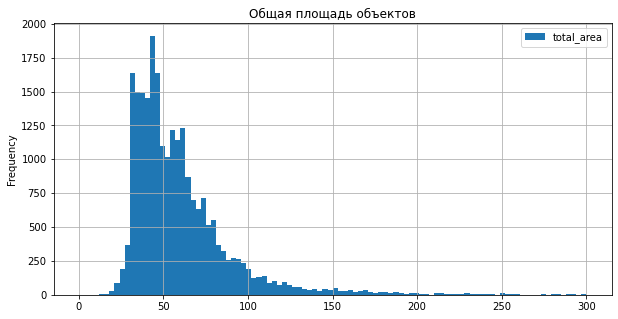

In [85]:
data.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, figsize = (10,5), range = (0,300), title='Общая площадь объектов')
data['total_area'].describe()

Построим гистограмму для столбца с общей площадью. По гистограмме видно, что в среднем площадь квартиры составляет 60 кв.м. Медиана по гистограмме - 52 кв.м. Самая маленькая площадь - 12 кв.м. Самая большая - 900 кв.м.

<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет
    
Отличный график у тебя вышел. Я бы только добавил название. Так сразу будет понятно, что ты на нем пытаешься показать. Сделать это можно параметром title
</div 

<font color="purple"> Комментарий студента: Спасибо за рекомендацию! Добавлю названия в графики! 

count    23650.000000
mean        34.582279
std         22.359584
min          2.000000
25%         19.000000
50%         30.000000
75%         42.100000
max        409.700000
Name: living_area, dtype: float64

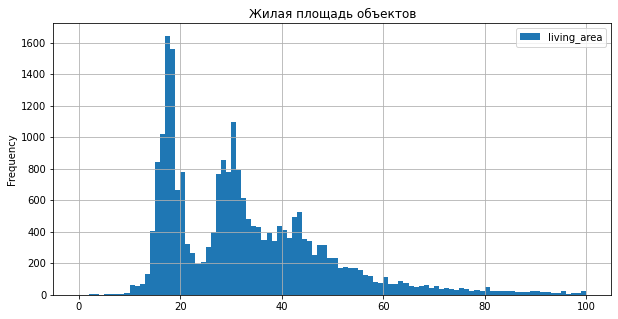

In [86]:
data.plot(y = 'living_area', kind = 'hist', bins = 100, grid=True, figsize = (10,5), range = (0,100), title='Жилая площадь объектов')
data['living_area'].describe()

Построим гистограмму для столбца с жилой площадью. По гистограмме видно, что в среднем жилая площадь квартиры составляет 34 кв.м. Медиана по гистограмме - 30 кв.м. Самая маленькая жилая площадь - 2 кв.м. Самая большая - 409.7 кв.м. 

count    23650.000000
mean        10.502873
std          6.037438
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

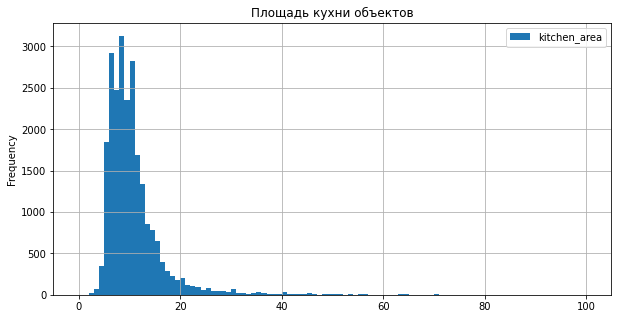

In [87]:
data.plot(y = 'kitchen_area', kind = 'hist', bins = 100, grid=True, figsize = (10,5), range = (0,100), title='Площадь кухни объектов')
data['kitchen_area'].describe()

Построим гистограмму для столбца с площадью кухни. По гистограмме видно, что в среднем площадь кухни составляет 10.5 кв.м. Медиана по гистограмме - 9 кв.м. Самая маленькая жилая площадь - 1.3 кв.м. Самая большая - 112 кв.м.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Верно, кухни у нас небольшие получаются. 
</div 

count    23650.000000
mean         6.541127
std         10.896399
min          0.012190
25%          3.400000
50%          4.650000
75%          6.799000
max        763.000000
Name: last_price, dtype: float64

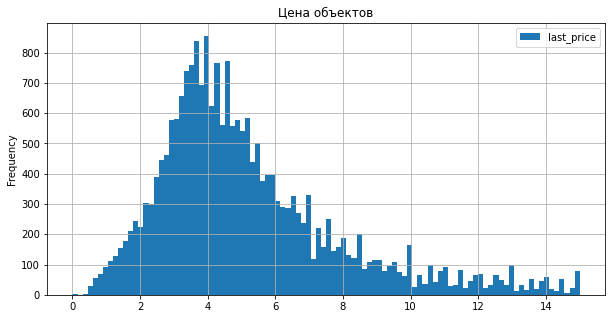

In [88]:
data['last_price'] = data['last_price']/1000000
data.plot(y = 'last_price', kind = 'hist', bins = 100, grid=True, figsize = (10,5), range = (0,15), title='Цена объектов')
data['last_price'].describe()

Построим гистограмму для столбца с ценой объекта. По гистограмме видно, что в среднем цена объекта составляет 6,5 млн.руб. Медиана по гистограмме - 4,6 млн.р. Самая маленькая цена - 12 тыс.руб. Самая большая - 763 млн.руб.

count    23650.000000
mean         2.070106
std          1.078620
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

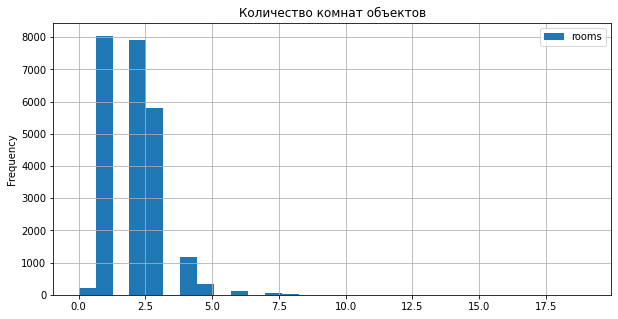

In [89]:
data.plot(y = 'rooms', kind = 'hist', bins = 30, grid=True, figsize = (10,5), title='Количество комнат объектов')  
data['rooms'].describe()

Построим гистограмму для столбца с количеством комнат. По гистограмме видно, что в среднем 2 комнаты в объекте. Медиана по гистограмме - 2 комнаты. Самое маленькое значение - 0 комнат. Самая большое - 19 комнат.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Здесь тоже ничего из логики не выбивается. Есть выбросы, но они в пределах допустимого. Можно их ограниичить. 
</div 

count    23650.000000
mean         2.699381
std          0.277033
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         20.000000
Name: ceiling_height, dtype: float64

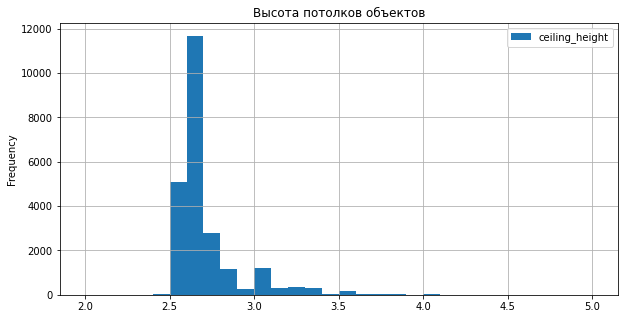

In [90]:
data.plot(y = 'ceiling_height', kind = 'hist', bins = 30, grid=True, figsize = (10,5), range = (2,5), title='Высота потолков объектов')
data['ceiling_height'].describe()

Построим гистограмму для столбца с высотой потолков. По гистограмме видно, что средняя высота потолка составляет 2,7 метра. Медиана по гистограмме - 2,65 метров. Самое маленькое значение - 1 метр. Самая большое - 20 метров.

<AxesSubplot:>

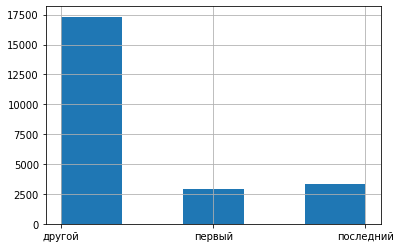

In [91]:
data['floor_category'].hist(bins = 5)

Построим гистограмму для столбца с этажами квартир. По гистограмме видно, что в основном сдаются квартиры, которые находятся выше второго этажа. 

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Квартиры на первом этаже пользуются наименьшим спросом. 
</div 

count    23565.000000
mean        10.675875
std          6.594823
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

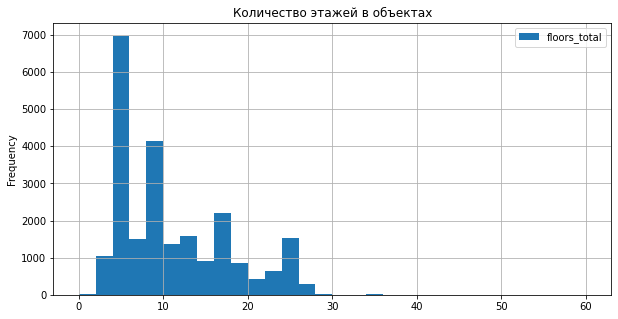

In [92]:
data.plot(y = 'floors_total', kind = 'hist', bins = 30, grid=True, figsize = (10,5), range = (0,60), title='Количество этажей в объектах')
data['floors_total'].describe()

Построим гистограмму для столбца общим количеством этажей в доме. По гистограмме видно, что в среднем в доме 10 этажей. Медиана по гистограмме - 9 этажей. Самое маленькое значение - 1 этаж. Самая большое - 60 этажей.

count    18139.000000
mean     14197.860742
std       8606.830295
min        181.000000
25%       9241.000000
50%      13105.000000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

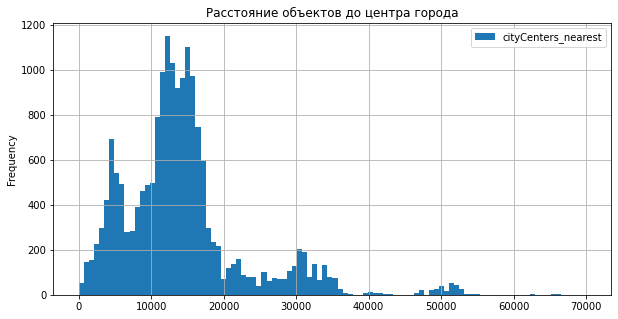

In [94]:
data.plot(y = 'cityCenters_nearest', kind = 'hist', bins = 100, grid=True, figsize = (10,5), range = (0,70000), title='Расстояние объектов до центра города') 
data['cityCenters_nearest'].describe()

Построим гистограмму для столбца c расстоянием до центра города в метрах. По гистограмме видно, что в среднем расстояние до центра города -  14198 метров. Медиана по гистограмме - 13105 метров. Самое маленькое значение - 181 метр. Самая большое - 65968 метров.

count    18116.000000
mean     28803.225878
std      12637.314144
min          0.000000
25%      18575.750000
50%      26756.500000
75%      37294.000000
max      84869.000000
Name: airports_nearest, dtype: float64

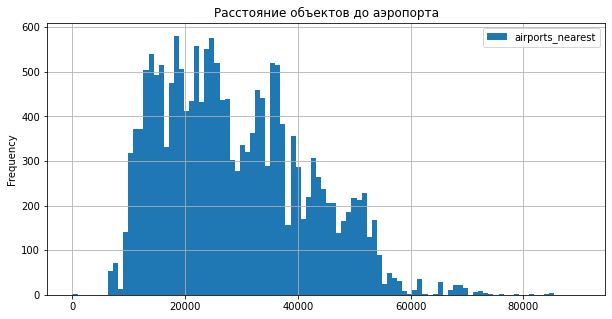

In [95]:
data.plot(y = 'airports_nearest', kind = 'hist', bins = 100, grid=True, figsize = (10,5), range = (0,90000), title='Расстояние объектов до аэропорта')
data['airports_nearest'].describe()

Построим гистограмму для столбца c расстоянием до аэропорта в метрах. По гистограмме видно, что в среднем расстояние до аэропорта - 28803 метра. Медиана по гистограмме - 26756 метров. Самое маленькое значение - 0 метров. Самая большое - 84869 метров.

count    8064.000000
mean      490.830729
std       342.554386
min         1.000000
25%       288.000000
50%       454.500000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

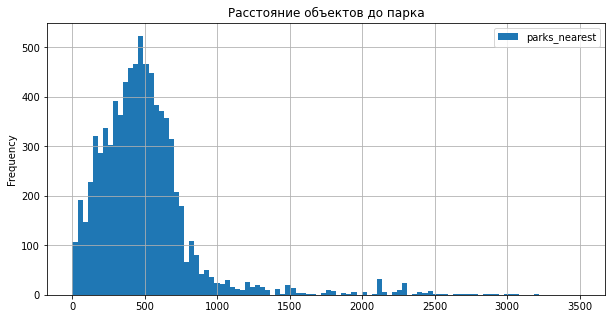

In [96]:
data.plot(y = 'parks_nearest', kind = 'hist', bins = 100, grid=True, figsize = (10,5), range = (0,3500), title='Расстояние объектов до парка') 
data['parks_nearest'].describe()

Построим гистограмму для столбца c расстоянием до парка в метрах. По гистограмме видно, что в среднем расстояние до парка - 490 метра. Медиана по гистограмме - 454 метра. Самое маленькое значение - 1 метр. Самая большое - 3190 метров.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Верные выводы делаешь из графиков. 
</div 

count    23650.000000
mean         2.568710
std          1.788808
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: weekday_publication, dtype: float64

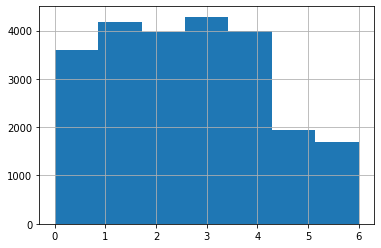

In [97]:
data['weekday_publication'].hist(bins = 7)
data['weekday_publication'].describe()

Построим гистограмму для столбца c днем публикации объявления. По гистограмме видно, что в основном объявления выкладываются с понедельника по четверг. Меньше всего выкладывают объявлений в воскресенье.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Выходные являются причиной просадки публикуемых объявлений. 
</div 

count    23650.000000
mean         6.401564
std          3.491418
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month_publication, dtype: float64

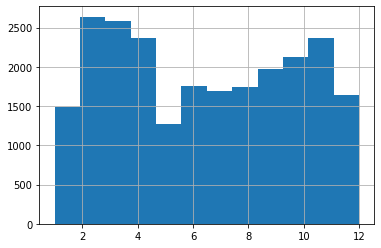

In [98]:
data['month_publication'].hist(bins = 12)
data['month_publication'].describe()

Построим гистограмму для столбца c месяцем публикации объявления. По гистограмме видно, что в основном объявления выкладывают зимой и осенью. Меньше всего выкладывают весной.

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

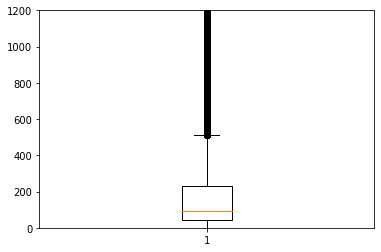

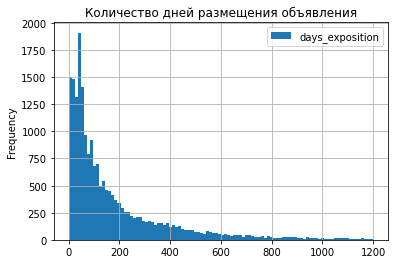

In [99]:
plt.boxplot(data[data['days_exposition']!=0]['days_exposition'])
plt.ylim(0,1200)
data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1,1200), title='Количество дней размещения объявления')
data[data['days_exposition']!=0]['days_exposition'].describe()
#data[data['days_exposition']!=0]['days_exposition'].value_counts()

По диаграмме размаха видно, что большая часть значений лежит в диапазоне до 300 дней. Нижний «ус» упирается к 100 дню. Верхний заканчивается около 500 дней, получается это граница нормального размаха. Среднее по данным столбца с количеством дней размещения объявления - 180 дней, медиана - 95 дней. В среднем квартиры продаются за 200 дней. Быстрыми продажами считаются квартиры, которые продались меньше чем за 95 дней. Необычно долгими - после 500 дня. По полученным данным и гистограмме видно распределение Пуассона. Внимательно рассмотрев график, можно обнаружить выбивающиеся значения. Через value_counts можно получить аномальные значения, 45, 60, 7, 30, 90 дней - наиболее частое количество дней снятия объявления. Скорее всего выбивающиеся значения связаны с правилами размещения объявлений на Яндекс.Недвижимость.

<div class="alert alert-block alert-danger">
 
### Комментарий ревьюера
    
#### Ошибка
    
Вот в этом месте стоит посмотреть график более подробно. Тут можно будет заметить выбивающиеся значения. Как думаешь, откуда они появились? 
</div 

<font color="purple"> Комментарий студента: Спасибо за рекомендацию! И правда, у нас много выбивающихся значений, к сожалению не обратил на них внимание, оказывается, что это связано с правилами размещения объявлений. Спасибо, что навели на правильный путь! 

<div class="alert alert-block alert-success">
 
# Комментарий ревьюера ver.2 
    
#### Успех
    
Да, здорово. Сейчас согласен с тобой. 
</div

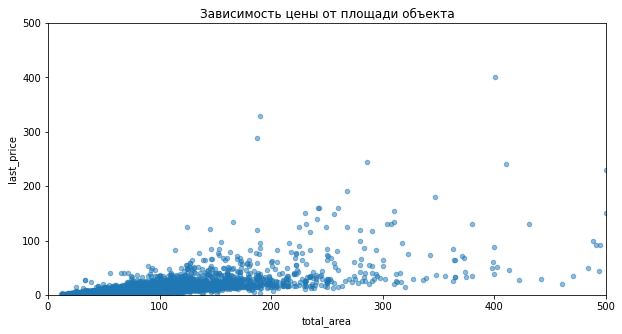

Зависимость цены от площади объекта: 0.6537428966335398


In [100]:
data.plot(y = 'last_price', x = 'total_area', kind = 'scatter', xlim = (0,500), ylim = (0,500), alpha=0.50, figsize = (10,5), title='Зависимость цены от площади объекта') 
plt.show()
print('Зависимость цены от площади объекта:', data['total_area'].corr(data['last_price']))

Есть основная масса точек с наиболее частыми сочетаниями площади и цены квартиры. Корреляция сравниваемых значений выше среднего, это говорит о том, что с увеличением количества площади увеличивается и цена. Также есть уникальные примеры квартир, которые выбиваются от общей картины. Однако есть и совсем уникальные значения, где квартиры стоят меньше при большей площади. 

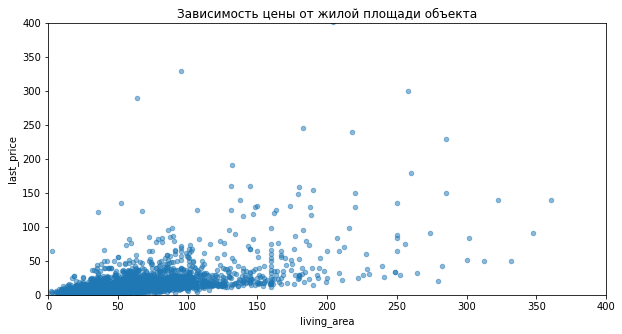

Зависимость цены от жилой площади объекта: 0.5858308818427347


In [101]:
data.plot(y = 'last_price', x = 'living_area', kind = 'scatter', xlim = (0,400), ylim = (0,400), alpha=0.50, figsize = (10,5), title = 'Зависимость цены от жилой площади объекта') 
plt.show()
print('Зависимость цены от жилой площади объекта:', data['living_area'].corr(data['last_price']))

Есть основная масса точек с наиболее частыми сочетаниями жилой площади и цены квартиры. Корреляция в 0.51 говорит о наличии связи, однако не слишком сильной, это говорит о том, что в основном с увеличением количества жилой площади увеличивается и цена. Также есть уникальные примеры квартир, которые выбиваются от общей картины. Однако есть и совсем уникальные значения, где квартиры стоят меньше при большей жилой площади.

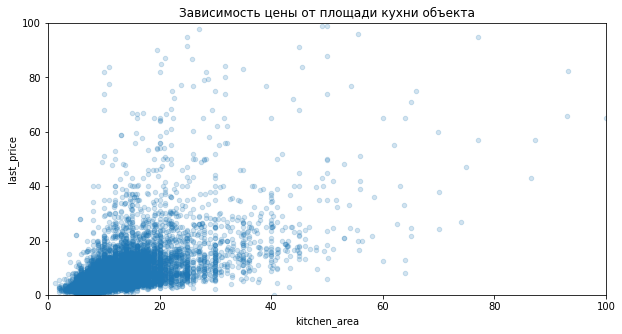

Зависимость цены от площади кухни объекта: 0.514493348724131


In [102]:
data.plot(y = 'last_price', x = 'kitchen_area', kind = 'scatter', xlim = (0,100), ylim = (0,100), alpha=0.20, figsize = (10,5), title = 'Зависимость цены от площади кухни объекта') 
plt.show()
print('Зависимость цены от площади кухни объекта:', data['kitchen_area'].corr(data['last_price']))

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Классный метод демонстрируешь для показа зависимости. 
</div 

Есть основная масса точек с наиболее частыми сочетаниями площади кухни и цены квартиры. Корреляция в 0.51 говорит о наличии связи, однако не слишком сильной. Выходит, в основном увеличение площади кухни сопровождается с прибавкой цены. Также есть уникальные примеры квартир, которые выбиваются от общей картины. Однако есть и совсем уникальные значения, где квартиры стоят меньше при большей площади кухни.

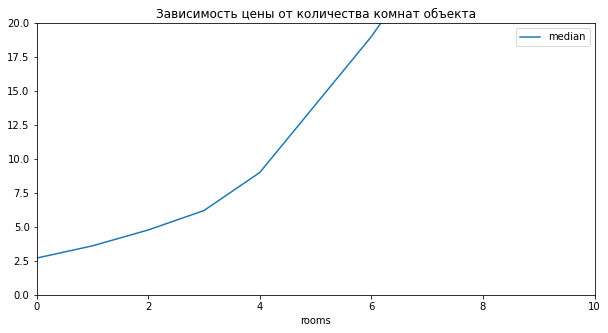

Зависимость цены от количества комнат объекта: 0.3634206221877072


In [103]:
price_rooms = data.pivot_table(index = 'rooms', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
price_rooms.columns = ['mean', 'count', 'median']
price_rooms.query('count > 50').plot(y = 'median', xlim = (0,10), ylim = (0,20), figsize = (10,5),  title = 'Зависимость цены от количества комнат объекта')
price_rooms.query('count > 50').sort_values('median', ascending = False)
plt.show()
print('Зависимость цены от количества комнат объекта:',data['rooms'].corr(data['last_price'])) 

Корреляция в 0.36 говорит о слабой связи между количеством комнат и ценой. Однако, по графику можно заметить, что существует небольшая зависимость от числа комнат и цены за объект.

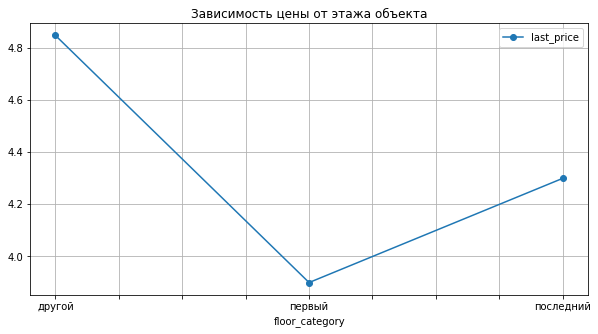

In [104]:
(
    data.pivot_table(index='floor_category', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(10, 5),  title = 'Зависимость цены от этажа объекта')
)
plt.show() 

По графику видно, что первый этаж влияет на стоимость квартиры. В основном квартиры на первом этаже стоят дешевле. Наибольшая стоимость у квартир, которые расположены между первым и последним. 


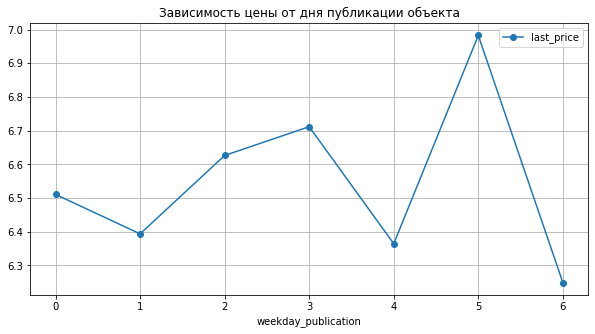

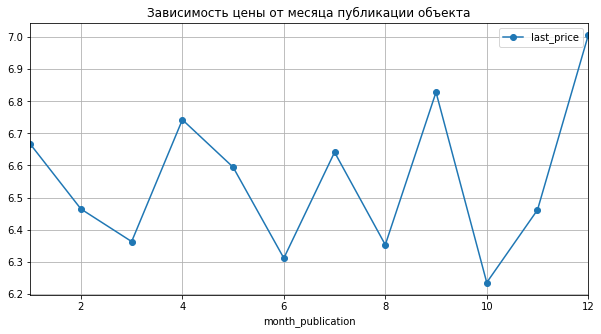

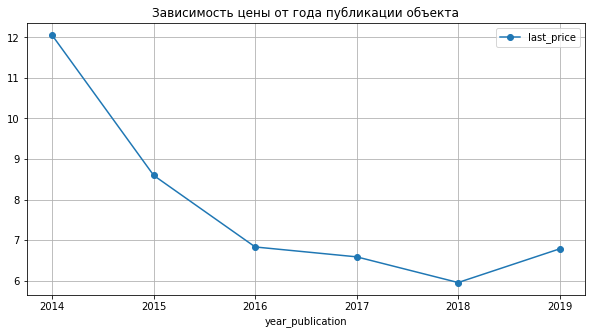

In [105]:

(
    data.pivot_table(index='weekday_publication', values='last_price')
    .plot(grid=True, style='o-', figsize=(10, 5), title = 'Зависимость цены от дня публикации объекта')
)
plt.show()

(
    data.pivot_table(index='month_publication', values='last_price')
    .plot(grid=True, style='o-', xlim=(1,12), figsize=(10, 5), title = 'Зависимость цены от месяца публикации объекта')
)
plt.show()

(
    data.pivot_table(index='year_publication', values='last_price')
    .plot(grid=True, style='o-', figsize=(10, 5), title = 'Зависимость цены от года публикации объекта')
)
plt.show()

По графику видно, что самые дорогие квартиры были опубликованы в среду, самые дешевые в субботу. Также самые дорогие квартиры продаются с декабря, дешевле всего - с октября. Стоит отметить, что квартиры меньше всего стоили 2016-2017 году. Это может быть связанно, с тем, что растущий объем предложения новостроек, которые имеют более низкую стоимость при более высоком качестве строительства, проводимая в 2016 году, повлияла на спрос на регулярном рынке и в течение всего года цены на жилье снижались. 

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Выводы логичные и соответствуют тому, что мы видим на графике. 
</div 

In [106]:
city_square_meter = data.pivot_table(index = 'locality_name', values = 'price_square_meter', aggfunc=['count', 'mean'])
city_square_meter.columns = ['count', 'mean']
city_square_meter['mean'] = city_square_meter['mean'].astype('int')
city_square_meter = city_square_meter.sort_values('count', ascending = False).head(10)
display(city_square_meter)

,count,mean
locality_name,,
Санкт-Петербург,15721,114849
Мурино,590,86087
Кудрово,472,95324
Шушары,440,78677
Всеволожск,398,68654
Пушкин,369,103125
Колпино,338,75424
Парголово,327,90175
Гатчина,307,68746


<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Рейтинг городом топ-10 получили. 
</div 

Данные выглядят обоснованно, по таблице видно, что самая высокая стоимость квадратного метра в Санкт-Петербурге. Самая низкая стоимость квадратного метра в Выборге. 

,price_square_meter
centers_nearest_km,
0,187324.130319
1,166603.755531
2,146662.860056
3,129416.344615
4,137475.497055
5,146979.232519
6,152277.893519
7,141399.731456
8,120581.349830


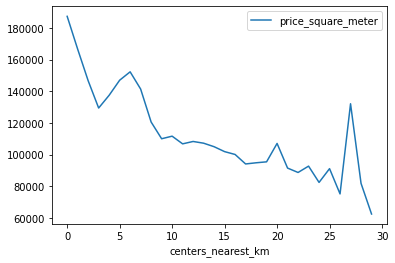

In [107]:
data['centers_nearest_km'] = data['cityCenters_nearest']/1000
data['centers_nearest_km'] = data['centers_nearest_km'].fillna(999999)
data['centers_nearest_km'] = data['centers_nearest_km'].astype('int')
pivot_table_km = data.query('locality_name == "Санкт-Петербург" and centers_nearest_km !=999999').pivot_table(index = 'centers_nearest_km', values = 'price_square_meter', aggfunc = 'mean')
pivot_table_km.plot()
display(pivot_table_km) 

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Предположение по центру чуть оспорю, тут хоть и есть падение в районе 3 км, но все же график потом набирает и после 8 км падает. Примерно до этой зоны находится центр. 
</div 

Данные выглядят обоснованно, по таблице видно, что центром можно назвать радиус около 3 км. И чем дальше от центра, тем дешевле стоит квадратный метр. Однако, после 25 км от центра резкий скачок цены, это может объясняться тем, что Санкт-Петербург славится своими прекрасными видами возле финского залива, и жилье возле таких мест дороже средней цены. 

### Общий вывод

   В ходе работы было проведено исследование выявления особенностей и зависимости, которые существуют на рынке недвижимости. 
Входные данные от сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населенных пунктах.
   Перед началом исследование необходимо было обработать входные данные. В ходе работы были обработаны пропущенные значения,  заменены типы данных для простоты исследования. Посчитаны и добавлены в таблицу новые столбцы: цена квадратного метра объекта, день недели публикации объявления, месяц, год публикации объявления, тип этажа квартиры, расстояние до центра города в километрах. Также были исправлены значения в столбцах: площадь, цена, число комнат, высота потолков. Были выявлены аномалии во входных данных. После всех исправлений можно приступать к исследованию по выявлению особенностей и зависимостей на рынке недвижимости в Санкт-Петербурге и соседних населенных пунктах.

Перед проведением исследования были поставлены следующие гипотезы:

1. Есть ли зависимость между общей площади и ценой объекта?;
2. Есть ли зависимость между жилой площадью и ценой объекта?;
3. Есть ли зависимость между площади кухни и ценой объекта?;
4. Есть ли зависимость между количеством комнат и ценой объекта?;
5. Есть ли зависимость между этажа, на котором расположена квартира и ценой объекта?;
6. Есть ли зависимость между датой размещения и ценой объекта?;
7. Есть ли зависимость между расстоянием объекта от центра города?.

В ходе исследования удалось выявить следующие зависимости:
  
Гипотеза 1 подтверждена: зависимость цены от площади квартиры: 0.6537428966335398.
Есть основная масса точек с наиболее частыми сочетаниями площади и цены квартиры. Корреляция сравниваемых значений выше среднего, это говорит о том, что с увеличением количества площади увеличивается и цена.
Рекомендация: Опираться на данную зависимость при исследовании данных.

Гипотеза 2 частично подтверждена: зависимость цены от жилой площади квартиры: 0.5858308818427347.

Есть основная масса точек с наиболее частыми сочетаниями жилой площади и цены квартиры. Корреляция в 0.51 говорит о наличии связи, однако не слишком сильной, это говорит о том, что в основном с увеличением количества жилой площади увеличивается и цена.
Рекомендация: частично опираться на данную зависимость при исследовании данных.

Гипотеза 3 частично подтверждена: зависимость цены от площади кухни: 0.514493348724131.

Есть основная масса точек с наиболее частыми сочетаниями площади кухни и цены квартиры. Корреляция в 0.51 говорит о наличии связи, однако не слишком сильной. Выходит, в основном увеличение площади кухни сопровождается с прибавкой цены.
Рекомендация: не опираться на данную зависимость при исследовании данных.

Гипотеза 4 частично подтверждена: зависимость цены от количества комнат: 0.3634206221877072.

Корреляция в 0.36 говорит об слабой связи между количеством комнат и ценой. Однако, можно наблюдать небольшую зависимость между количеством комнат и возрастанием цены за объект.
Рекомендация: не опираться на данную зависимость при исследовании данных.

Гипотеза 5 частично подтверждена:

По полученным данным видно, что в основном квартиры на первом этаже стоят дешевле. Наибольшая стоимость у квартир, которые расположены между первым и последним.
Рекомендация: частично опираться на данную зависимость.

Гипотеза 6 частично подтверждена: 

По графику видно, что самые дорогие квартиры были опубликованы в среду, самые дешевые в субботу. Также самые дорогие квартиры продаются с декабря, дешевле всего - с октября. Стоит отметить, что квартиры меньше всего стоили 2016-2017 году. Это может быть связанно, с тем, что растущий объем предложения новостроек, которые имеют более низкую стоимость при более высоком качестве строительства, проводимая в 2016 году, повлияла на спрос на регулярном рынке и в течение всего года цены на жилье снижались.
Рекомендация: не опираться на данную зависимость при исследовании данных. 

Гипотеза 7 частично подтверждена: 
Данные выглядят обоснованно, по таблице видно, что чем дальше от центра, тем дешевле квадратный метр. Однако, после 25 км от центра резкий скачок цены. Это может обуславливаться тем, что есть отдаленные районы от центра с дорогими объектами жилья и т.д. 

Общие рекомендации: 
Таким образом мы получили данные, которые позволяют зафиксировать основные зависимости и особенности на рынке недвижимости в Санкт-Петербурге и соседних населенных пунктах. Основная зависимость в полученных данных между общей площадью объекта и его цены. Также на цену объекта влияет его жилая площадь и этаж на котором расположена квартира. Площадь кухни, количество комнат, этаж квартиры имеют небольшое влияние на цену объекта. Расстояние от центра также влияет на цену объекта, однако, в полученных данных мы также имеем дорогие квартиры, которые находятся в пределах 25-30 км от центра. Самые дорогие квартиры обычно публиковались в среду, самые дешевые в субботу. Если смотреть по месяцам, то самые дорогие объекты продаются с декабря, самые дешевые - с октября. Однако, использовать эти данные при изучении цен на недвижимость не стоит. Стоит отметить, интересную особенность: квартиры меньше всего стоили 2016-2017 году, скорее всего, из-за массового строительства новостроек в 2016 году. 
Также можно отметить некоторые особенности на рынке недвижимости в Санкт-Петербурге: среднем площадь квартиры составляет 60 кв.м., жилая площадь 34 кв.м., площадь кухни 10.5 кв.м, средняя цена объекта составляет 6,5 млн.руб., среднее количество комнат в объекте - 2 комнаты, средняя высота потолка 2,7 метра, в среднем дома имеют 10 этажей, среднем расстояние до центра города 14 км., в среднем квартиры продаются за 200 дней, быстрые продажами - меньше чем за 95 дней, необычно долгие - 500 дней и больше. 


<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Вывод является идеальными завершением проекта. Помимо того, что здесь ты отмечаешь все то, что обнаружил в результате исследования, в выводе содержатся рекомендации. С таким выводом смело можно идти к заказчику. Теперь мы точно сможет составить антифрод-систему для сервиса недвижимости. 
</div 

<div class="alert alert-block alert-info">

## Итоговый комментарии от ревьюера:
    
#### Успех

Благодарю тебя за выполнение проекта. Мне очень понравилось, как ты разобрался с предобработкой данных. Твои выводы вполне логичны и все на своих местах. Сама работа с кодом последовательна, что радует. Ты подбираешь правильные методы для анализа и строишь хорошие графики. Особо хочу отметить подробный итоговый вывод. Однако, в проекте есть несколько замечаний, которые надо исправить:

* Требуется переделать замену пропусков по этажам. 
* Необходимо заметить и пояснить выбивающиеся значения по одному из графиков. 
       
Еще я оставил рекомендации. Очень надеюсь, что ты учтешь их в этом и последующих проектах.
       
Жду проект после доработки. Уверен, ты справишься.
</div>

<font color="purple"> Комментарий студента: Спасибо за приятные слова! И за то, что проверили проект, учел все рекомендации, надеюсь, что теперь все сделано правильно! 

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод